In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import os
import sys
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
grandparent_dir = os.path.dirname(parent_dir)
sys.path.append(parent_dir)
utils_dir = os.path.join(parent_dir, grandparent_dir, "src", "utils")
sys.path.append(utils_dir)
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
utils_dir = os.path.join(parent_dir, "src", "utils")
sys.path.append(utils_dir)

In [2]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from process_data import process_data
from weighted_accuracy import weighted_accuracy_scorer
from plot_learning_curves import plot_learning_curves
from weighted_accuracy_and_tools import decompose_y, reconstruct_y


In [3]:
X = os.path.join("..","data","original_input", "X_train_filled.csv")
Y = os.path.join("..","data","original_input", "X_test_GgyECq8.csv")
W = os.path.join("..","data","original_input", "y_train_jJtXgMX.csv")

X_train = pd.read_csv(X, delimiter=',')
X_test = pd.read_csv(Y,delimiter=',')
y_train = pd.read_csv(W, delimiter=',')
delivery_start = X_test["DELIVERY_START"]

In [4]:
X_train = process_data(X_train.copy(deep=True), "predicted_spot_price", None, "standard")
X_test = process_data(X_test.copy(deep=True), "predicted_spot_price", None, "standard")
y_train = process_data(y_train.copy(deep=True), None, None, None)

In [5]:
y_train_direction, y_train_magnitude = decompose_y(y_train['spot_id_delta'])

In [6]:
y_train_direction

DELIVERY_START
2022-01-01 01:00:00+00:00    0
2022-01-01 02:00:00+00:00    0
2022-01-01 03:00:00+00:00    0
2022-01-01 04:00:00+00:00    1
2022-01-01 05:00:00+00:00    1
                            ..
2023-03-29 17:00:00+00:00    1
2023-03-29 18:00:00+00:00    1
2023-03-29 19:00:00+00:00    1
2023-03-29 20:00:00+00:00    1
2023-03-29 21:00:00+00:00    1
Name: spot_id_delta, Length: 10605, dtype: int32

In [7]:
y_train_magnitude

DELIVERY_START
2022-01-01 01:00:00+00:00    36.874770
2022-01-01 02:00:00+00:00    12.643588
2022-01-01 03:00:00+00:00     1.950193
2022-01-01 04:00:00+00:00     1.938272
2022-01-01 05:00:00+00:00     0.199907
                               ...    
2023-03-29 17:00:00+00:00     6.029303
2023-03-29 18:00:00+00:00    13.576177
2023-03-29 19:00:00+00:00    17.478945
2023-03-29 20:00:00+00:00    17.559407
2023-03-29 21:00:00+00:00    16.503259
Name: spot_id_delta, Length: 10605, dtype: float64

In [8]:
y_train_direction_modified = y_train_direction.replace({0: -1})

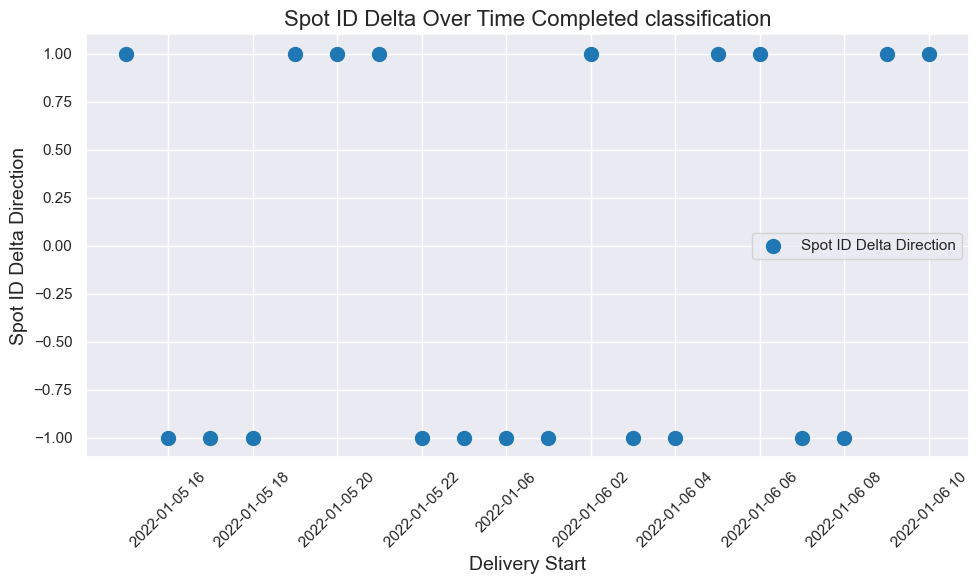

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Assuming df_filled.index is already a DatetimeIndex
# Setting seaborn style for better aesthetics
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

plt.figure(figsize=(10, 6))

# Plot data
plt.scatter(y_train_direction.index[110:130] ,y_train_direction_modified[110:130], label='Spot ID Delta Direction', color='tab:blue', marker = "o", s=100)

# Custom formatter function to avoid displaying zero for hours
def custom_date_formatter(x, pos):
    date = mdates.num2date(x)
    if date.hour == 0:
        return date.strftime('%Y-%m-%d')
    else:
        return date.strftime('%Y-%m-%d %H')

# Apply the custom formatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(custom_date_formatter))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.title('Spot ID Delta Over Time Completed classification', fontsize=16)
plt.xlabel('Delivery Start', fontsize=14)
plt.ylabel('Spot ID Delta Direction', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


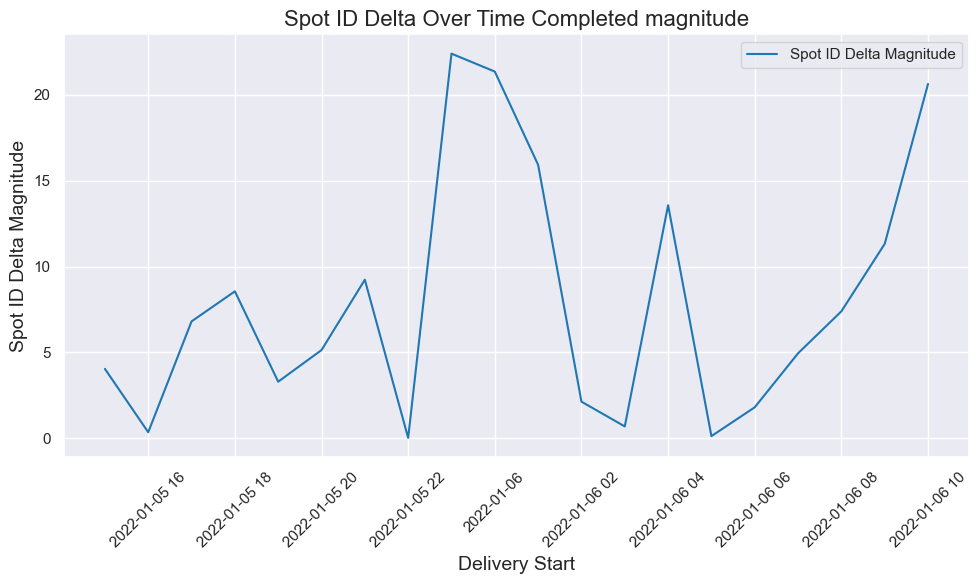

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Assuming df_filled.index is already a DatetimeIndex
# Setting seaborn style for better aesthetics
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

plt.figure(figsize=(10, 6))

# Plot data
plt.plot(y_train_magnitude.index[110:130] ,y_train_magnitude[110:130], label='Spot ID Delta Magnitude', color='tab:blue', linestyle='-')

# Custom formatter function to avoid displaying zero for hours
def custom_date_formatter(x, pos):
    date = mdates.num2date(x)
    if date.hour == 0:
        return date.strftime('%Y-%m-%d')
    else:
        return date.strftime('%Y-%m-%d %H')

# Apply the custom formatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(custom_date_formatter))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.title('Spot ID Delta Over Time Completed magnitude', fontsize=16)
plt.xlabel('Delivery Start', fontsize=14)
plt.ylabel('Spot ID Delta Magnitude', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


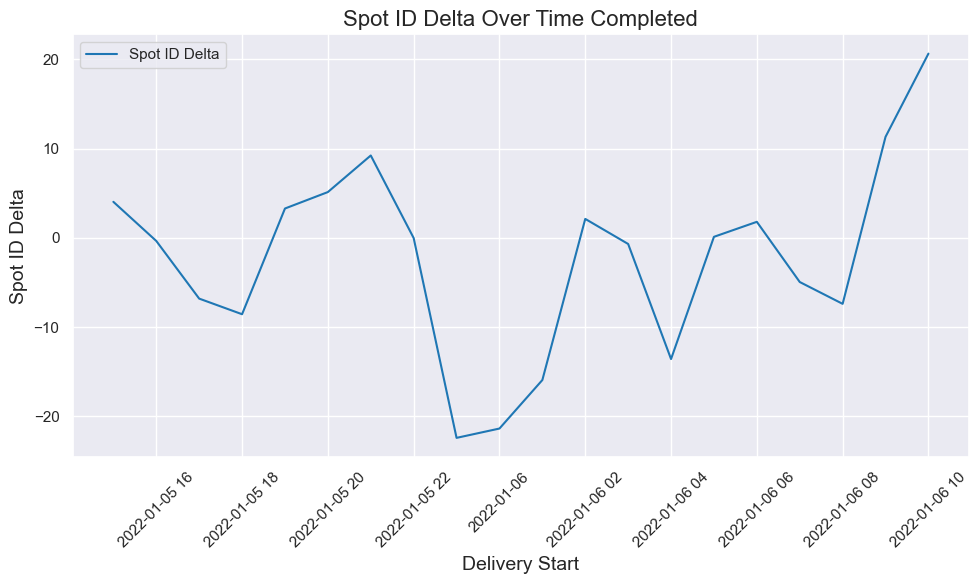

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Assuming df_filled.index is already a DatetimeIndex
# Setting seaborn style for better aesthetics
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

plt.figure(figsize=(10, 6))

# Plot data
plt.plot(y_train.index[110:130] ,y_train["spot_id_delta"][110:130], label='Spot ID Delta', color='tab:blue', linestyle='-')

# Custom formatter function to avoid displaying zero for hours
def custom_date_formatter(x, pos):
    date = mdates.num2date(x)
    if date.hour == 0:
        return date.strftime('%Y-%m-%d')
    else:
        return date.strftime('%Y-%m-%d %H')

# Apply the custom formatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(custom_date_formatter))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.title('Spot ID Delta Over Time Completed', fontsize=16)
plt.xlabel('Delivery Start', fontsize=14)
plt.ylabel('Spot ID Delta', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#
## Initialize the RandomForestRegressor
#reg = RandomForestRegressor(n_jobs=-1, **{'min_samples_leaf': 2, 'min_samples_split': 5})
#
## Set up the parameter grid to search
#reg.fit(X_train, y_train_magnitude)
#y_pred_magn = reg.predict(X_test)

In [13]:
#from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train_magnitude, y_test_magnitude are already defined

# Initialize the Linear Regression model
lr = LinearRegression()

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(lr, n_features_to_select="auto", direction='forward', scoring='neg_mean_squared_error', cv=5)

# Fit the Sequential Feature Selector with the training data
sfs.fit(X_train, y_train_magnitude)

# Transform training and test sets so they only contain the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Fit the Linear Regression model on the selected features
lr.fit(X_train_selected, y_train_magnitude)

# Make predictions on the test set using the selected features
y_pred_magn = lr.predict(X_test_selected)
# Calculate the Mean Squared Error for the predictions
#mse = mean_squared_error(y_test_magnitude, y_pred_magn)
#print(f'Mean Squared Error: {mse}')

# To see which features were selected
selected_features = np.where(sfs.get_support())[0]
print(f'Selected features (0-indexed): {selected_features}')


Selected features (0-indexed): [3 4 6 7]


In [14]:
d = {"DELIVERY_START" : delivery_start, "spot_id_delta" : y_pred_magn.reshape(-1)}
y_pred = pd.DataFrame(data = d)

y_pred.to_csv("../data/output_y_test/y_result_magn_lr1.csv", index = False)

In [15]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#
## Initialize and train the regressor
#regressor = RandomForestRegressor(n_estimators=100, random_state=42, **{'min_samples_leaf': 4, 'min_samples_split': 10})
#regressor.fit(X_train, y_train_direction)
##from sklearn.linear_model import LinearRegression


In [16]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
# RandomForestRegressor with specified hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, min_samples_leaf=4, min_samples_split=10, random_state=42)

# LinearRegression with SequentialFeatureSelector
# Note: It's important to use a pipeline to ensure feature selection is applied during cross-validation steps as well
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select="auto", direction='forward', scoring='neg_mean_squared_error', cv=5)
lr_sfs_pipeline = make_pipeline(sfs, lr)
# Combine regressors into a voting regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf_regressor),
    ('lr_sfs', lr_sfs_pipeline)
])
# Fit the voting regressor to the training data
voting_regressor.fit(X_train, y_train_direction)

# Make predictions on the test set


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   random_state=42)),
                            ('lr_sfs',
                             Pipeline(steps=[('sequentialfeatureselector',
                                              SequentialFeatureSelector(estimator=LinearRegression(),
                                                                        scoring='neg_mean_squared_error')),
                                             ('linearregression',
                                              LinearRegression())]))])

In [17]:
# Predict using the regressor
predictions = voting_regressor.predict(X_test)

# Apply thresholds to classify predictions
# Below 0.3 will be class 0, above 0.7 will be class 1, and in between will be unclassified (-1)
classified_predictions = []
for pred in predictions:
    if pred < 0.30:
        classified_predictions.append(0)
    elif pred > 0.35:
        classified_predictions.append(1)
    else:
        classified_predictions.append(-1)  # Unclassified
from collections import Counter

# classified_predictions contains the classified results, including -1 for unclassified instances # This should be the list you obtained in the previous step

# Use Counter to tally the occurrences of each class
class_counts = Counter(classified_predictions)

# Print the count of each class
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])
print("Unclassified count:", class_counts[-1])


Class 0 count: 35
Class 1 count: 4779
Unclassified count: 128


In [18]:
y_pred_dir = np.array(classified_predictions)

# Reassign unclassified (-1) predictions to class 1
y_pred_dir[y_pred_dir == -1] = 1

In [19]:
y_pred = reconstruct_y(y_pred_dir, y_pred_magn)

In [20]:
delivery_start, y_pred

(0       2023-04-02 00:00:00+02:00
 1       2023-04-02 01:00:00+02:00
 2       2023-04-02 02:00:00+02:00
 3       2023-04-02 03:00:00+02:00
 4       2023-04-02 04:00:00+02:00
                   ...            
 4937    2023-10-24 19:00:00+02:00
 4938    2023-10-24 20:00:00+02:00
 4939    2023-10-24 21:00:00+02:00
 4940    2023-10-24 22:00:00+02:00
 4941    2023-10-24 23:00:00+02:00
 Name: DELIVERY_START, Length: 4942, dtype: object,
 array([19.44716423, 19.40788904, 19.51824614, ...,  9.105149  ,
         9.57211154,  9.8595796 ]))

In [21]:
d = {"DELIVERY_START" : delivery_start, "spot_id_delta" : y_pred.reshape(-1)}
y_pred = pd.DataFrame(data = d)

y_pred.to_csv("../data/output_y_test/y_result_indecision_voting1.csv", index = False)

In [22]:
from collections import Counter

# classified_predictions contains the classified results, including -1 for unclassified instances # This should be the list you obtained in the previous step

# Use Counter to tally the occurrences of each class
class_counts = Counter(classified_predictions)

# Print the count of each class
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])
print("Unclassified count:", class_counts[-1])


Class 0 count: 35
Class 1 count: 4779
Unclassified count: 128


In [23]:
X = os.path.join("..","data","original_input", "X_train_spot_predict_with_decision_tree.csv")
Y = os.path.join("..","data","original_input", "X_test_GgyECq8.csv")
W = os.path.join("..","data","original_input", "y_train_jJtXgMX.csv")

X_train = pd.read_csv(X, delimiter=',')
X_test = pd.read_csv(Y,delimiter=',')
y_train = pd.read_csv(W, delimiter=',')
delivery_start = X_test["DELIVERY_START"]

In [24]:
X_train = process_data(X_train.copy(deep=True), "predicted_spot_price", None, "standard")
X_test = process_data(X_test.copy(deep=True), "predicted_spot_price", None, "standard")
y_train = process_data(y_train.copy(deep=True), None, None, None)

In [25]:
y_train_direction, y_train_magnitude = decompose_y(y_train['spot_id_delta'])

In [30]:
X_train = X_train[['load_forecast', 'coal_power_available', 'gas_power_available',
        'nucelear_power_available', 'wind_power_forecasts_average',
        'solar_power_forecasts_average', 'wind_power_forecasts_std',
        'solar_power_forecasts_std']]
X_train.columns, X_test.columns

(Index(['load_forecast', 'coal_power_available', 'gas_power_available',
        'nucelear_power_available', 'wind_power_forecasts_average',
        'solar_power_forecasts_average', 'wind_power_forecasts_std',
        'solar_power_forecasts_std'],
       dtype='object'),
 Index(['load_forecast', 'coal_power_available', 'gas_power_available',
        'nucelear_power_available', 'wind_power_forecasts_average',
        'solar_power_forecasts_average', 'wind_power_forecasts_std',
        'solar_power_forecasts_std'],
       dtype='object'))

In [31]:
#from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, X_test, y_train_magnitude, y_test_magnitude are already defined

# Initialize the Linear Regression model
lr = LinearRegression()

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(lr, n_features_to_select="auto", direction='forward', scoring='neg_mean_squared_error', cv=5)

# Fit the Sequential Feature Selector with the training data
sfs.fit(X_train, y_train_magnitude)

# Transform training and test sets so they only contain the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Fit the Linear Regression model on the selected features
lr.fit(X_train_selected, y_train_magnitude)

# Make predictions on the test set using the selected features
y_pred_magn = lr.predict(X_test_selected)
# Calculate the Mean Squared Error for the predictions
#mse = mean_squared_error(y_test_magnitude, y_pred_magn)
#print(f'Mean Squared Error: {mse}')

# To see which features were selected
selected_features = np.where(sfs.get_support())[0]
print(f'Selected features (0-indexed): {selected_features}')


Selected features (0-indexed): [3 4 6 7]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42, **{'min_samples_leaf': 4, 'min_samples_split': 10})
regressor.fit(X_train, y_train_direction)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

In [33]:
# Predict using the regressor
predictions = voting_regressor.predict(X_test)

# Apply thresholds to classify predictions
# Below 0.3 will be class 0, above 0.7 will be class 1, and in between will be unclassified (-1)
classified_predictions = []
for pred in predictions:
    if pred < 0.30:
        classified_predictions.append(0)
    elif pred > 0.35:
        classified_predictions.append(1)
    else:
        classified_predictions.append(-1)  # Unclassified
from collections import Counter

# classified_predictions contains the classified results, including -1 for unclassified instances # This should be the list you obtained in the previous step

# Use Counter to tally the occurrences of each class
class_counts = Counter(classified_predictions)

# Print the count of each class
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])
print("Unclassified count:", class_counts[-1])


Class 0 count: 35
Class 1 count: 4779
Unclassified count: 128


In [34]:
y_pred_dir = np.array(classified_predictions)

# Reassign unclassified (-1) predictions to class 1
y_pred_dir[y_pred_dir == -1] = 1

In [35]:
y_pred = reconstruct_y(y_pred_dir, y_pred_magn)

In [36]:
d = {"DELIVERY_START" : delivery_start, "spot_id_delta" : y_pred.reshape(-1)}
y_pred = pd.DataFrame(data = d)

y_pred.to_csv("../data/output_y_test/y_result_other_data1.csv", index = False)